In [1]:
import os
import chars2vec
import sklearn.decomposition
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import SnowballStemmer

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## FUNCTIONS AND GLOBALS

In [2]:
stemmer = SnowballStemmer('english')
stopwords_eng = stopwords.words('english')

In [3]:
def text_reader(file):
    with open(file, 'r') as fp:
        return fp.read()
    
def stem_clean_stopwords_doc(doc):
    word_list = word_tokenize(doc)
    word_list = [wd for wd in word_list if not wd in stopwords_eng]
    return [stemmer.stem(wd) for wd in word_list]

## LOAD AND CLEAN TEXT

In [5]:
folder = "/home/kapronczaym/chars_2_vec/text"

In [8]:
txts = [f for f in os.listdir(folder) if f.endswith('.txt')]

In [9]:
texts = [text_reader('/'.join([folder, txt])) for txt in txts]

In [10]:
cleaned_texts = [stem_clean_stopwords_doc(text) for text in texts]

## CHARS_2_VEC

#### INITIALIZE MODEL

In [12]:
c2v_model = chars2vec.load_model('eng_50')

#### CREATE EMBEDDING

In [14]:
words = cleaned_texts[0]
word_embeddings = c2v_model.vectorize_words(words)

#### 2D PROJECTION

In [17]:
projection_2d = sklearn.decomposition.PCA(n_components=2).fit_transform(word_embeddings)

#### VISUALIZE

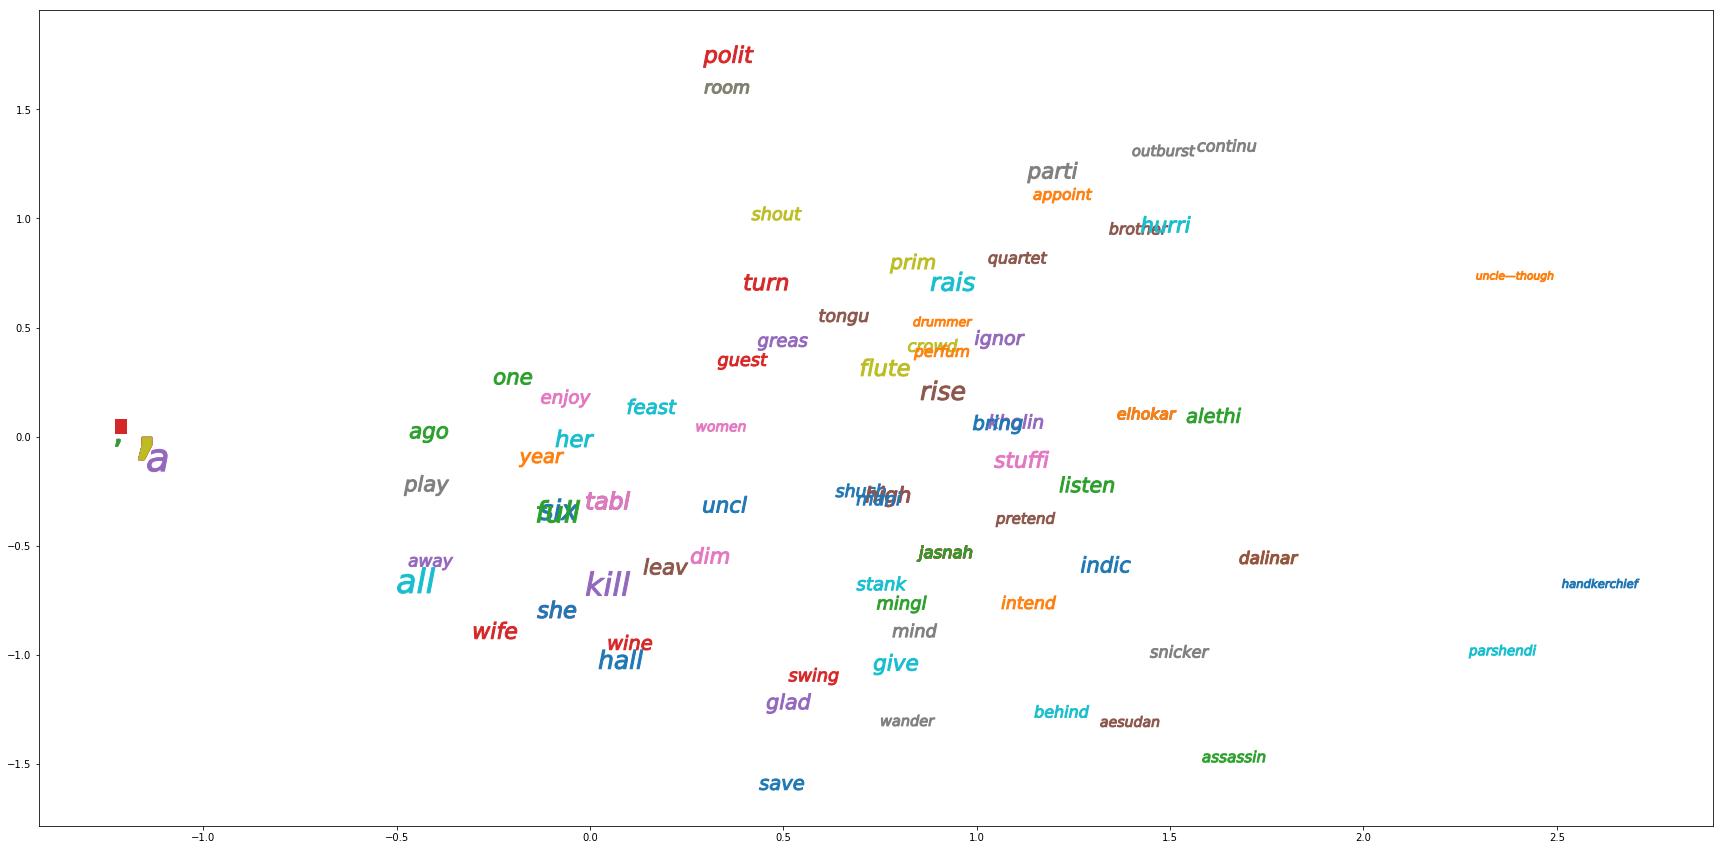

In [24]:
n = 100 # how many words to plot

f = plt.figure(figsize=(30,15))
for j in range(n):
    plt.scatter(projection_2d[j, 0], projection_2d[j, 1],
                marker=('$' + words[j] + '$'),
                s=500 * len(words[j]), label=j)

plt.show()